### **Real** **Estate** **Data**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
data = pd.read_csv("/content/Real Estate Data V21.csv")
data.head()

,Name,Property Title,Price,Location,Total_Area,Price_per_SQFT,Description,Baths,Balcony
0,Casagrand ECR 14,"4 BHK Flat for sale in Kanathur Reddikuppam, C...",₹1.99 Cr,"Kanathur Reddikuppam, Chennai",2583,7700.0,Best 4 BHK Apartment for modern-day lifestyle ...,4,Yes
1,"Ramanathan Nagar, Pozhichalur,Chennai",10 BHK Independent House for sale in Pozhichal...,₹2.25 Cr,"Ramanathan Nagar, Pozhichalur,Chennai",7000,3210.0,Looking for a 10 BHK Independent House for sal...,6,Yes
2,DAC Prapthi,"3 BHK Flat for sale in West Tambaram, Chennai",₹1.0 Cr,"Kasthuribai Nagar, West Tambaram,Chennai",1320,7580.0,"Property for sale in Tambaram, Chennai. This 3...",3,No
3,"Naveenilaya,Chepauk, Triplicane,Chennai",7 BHK Independent House for sale in Triplicane...,₹3.33 Cr,"Naveenilaya,Chepauk, Triplicane,Chennai",4250,7840.0,Entire Building for sale with 7 units of singl...,5,Yes
4,VGN Spring Field Phase 1,"2 BHK Flat for sale in Avadi, Chennai",₹48.0 L,"Avadi, Chennai",960,5000.0,"Property for sale in Avadi, Chennai. This 2 BH...",3,Yes


In [4]:
data.shape

(14528, 9)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14528 entries, 0 to 14527
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            14528 non-null  object 
 1   Property Title  14528 non-null  object 
 2   Price           14528 non-null  object 
 3   Location        14528 non-null  object 
 4   Total_Area      14528 non-null  int64  
 5   Price_per_SQFT  14528 non-null  float64
 6   Description     14528 non-null  object 
 7   Baths           14528 non-null  int64  
 8   Balcony         14528 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 1021.6+ KB


In [6]:
data.isnull().sum()

,0
Name,0
Property Title,0
Price,0
Location,0
Total_Area,0
Price_per_SQFT,0
Description,0
Baths,0
Balcony,0


In [7]:
import re
data['BHK'] = (data['Property Title'] + " " + data['Description']) \
                .str.extract(r'(\d+)\s*(?:bhk|bedroom|bed)', flags=re.IGNORECASE) \
                .astype(float)
print(data[['Property Title', 'Description', 'BHK']].head())


                                      Property Title  \
0  4 BHK Flat for sale in Kanathur Reddikuppam, C...   
1  10 BHK Independent House for sale in Pozhichal...   
2      3 BHK Flat for sale in West Tambaram, Chennai   
3  7 BHK Independent House for sale in Triplicane...   
4              2 BHK Flat for sale in Avadi, Chennai   

                                         Description   BHK  
0  Best 4 BHK Apartment for modern-day lifestyle ...   4.0  
1  Looking for a 10 BHK Independent House for sal...  10.0  
2  Property for sale in Tambaram, Chennai. This 3...   3.0  
3  Entire Building for sale with 7 units of singl...   7.0  
4  Property for sale in Avadi, Chennai. This 2 BH...   2.0  


In [8]:
data.duplicated().sum()

np.int64(8)

In [9]:
data.describe(include="all")

,Name,Property Title,Price,Location,Total_Area,Price_per_SQFT,Description,Baths,Balcony,BHK
count,14528,14528,14528,14528,14528.000000,14528.000000,14528,14528.000000,14528,14216.000000
unique,9998,6507,891,7050,NaN,NaN,14490,NaN,2,NaN
top,Classic Apartment,"2 BHK Flat for sale in Electronic City, Bangalore",₹60.0 L,"Sector 12 Dwarka, New Delhi",NaN,NaN,Sukhwani Landmarks has lauched Sukhwani Nysa i...,NaN,Yes,NaN
freq,42,53,407,44,NaN,NaN,5,NaN,8580,NaN
mean,NaN,NaN,NaN,NaN,1297.916988,11719.456222,NaN,2.751239,NaN,2.595174
std,NaN,NaN,NaN,NaN,1245.694305,49036.068632,NaN,0.898243,NaN,1.634555
min,NaN,NaN,NaN,NaN,70.000000,0.000000,NaN,1.000000,NaN,1.000000
25%,NaN,NaN,NaN,NaN,650.000000,4480.000000,NaN,2.000000,NaN,2.000000
50%,NaN,NaN,NaN,NaN,1000.000000,6050.000000,NaN,3.000000,NaN,2.000000
75%,NaN,NaN,NaN,NaN,1439.000000,9312.500000,NaN,3.000000,NaN,3.000000


In [10]:
print("\nCorrelation matrix:\n", data.corr(numeric_only=True))


Correlation matrix:
                 Total_Area  Price_per_SQFT     Baths       BHK
Total_Area        1.000000        0.153151  0.529589  0.584091
Price_per_SQFT    0.153151        1.000000  0.005869  0.011552
Baths             0.529589        0.005869  1.000000  0.463696
BHK               0.584091        0.011552  0.463696  1.000000


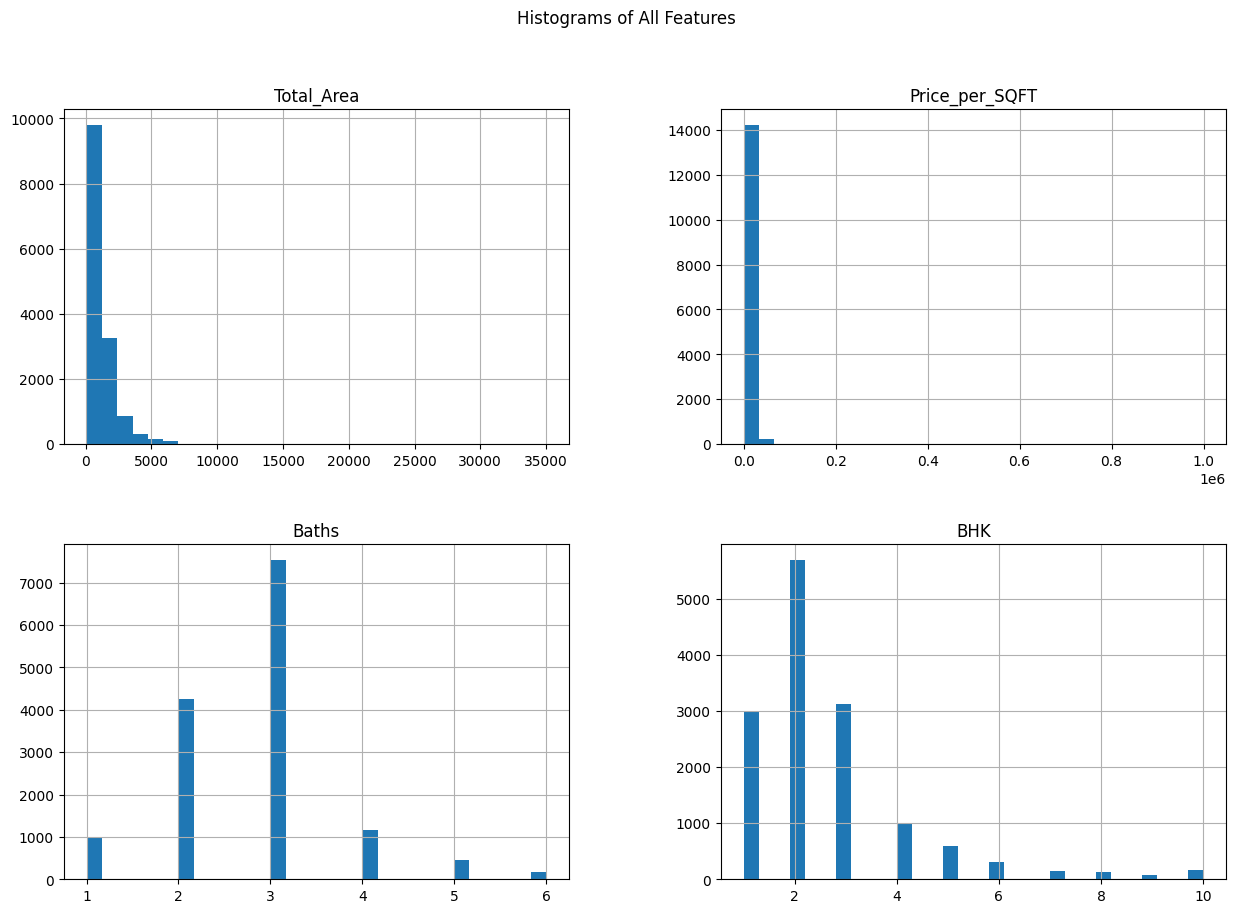

In [11]:
data.hist(bins=30, figsize=(15,10))
plt.suptitle("Histograms of All Features")
plt.show()

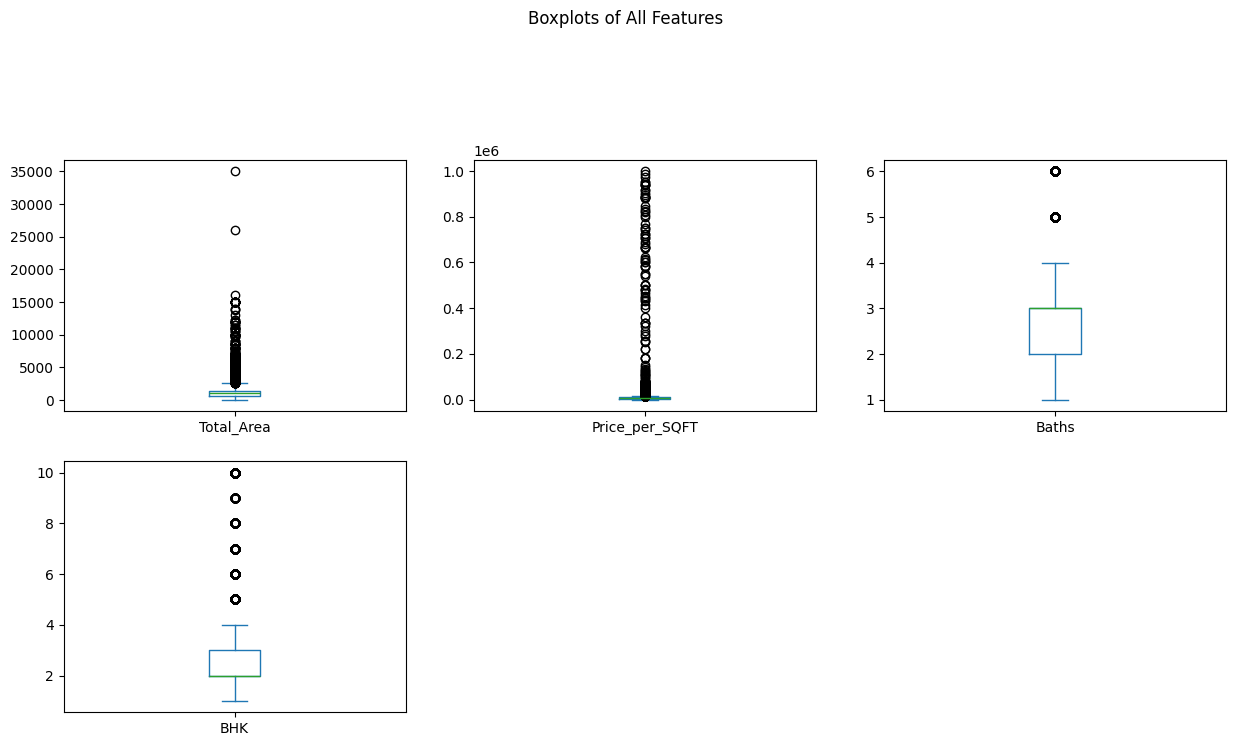

In [12]:
data.plot(kind="box", subplots=True, layout=(int(np.ceil(len(data.columns)/3)), 3),
          figsize=(15,15), sharex=False, sharey=False)
plt.suptitle("Boxplots of All Features")
plt.show()

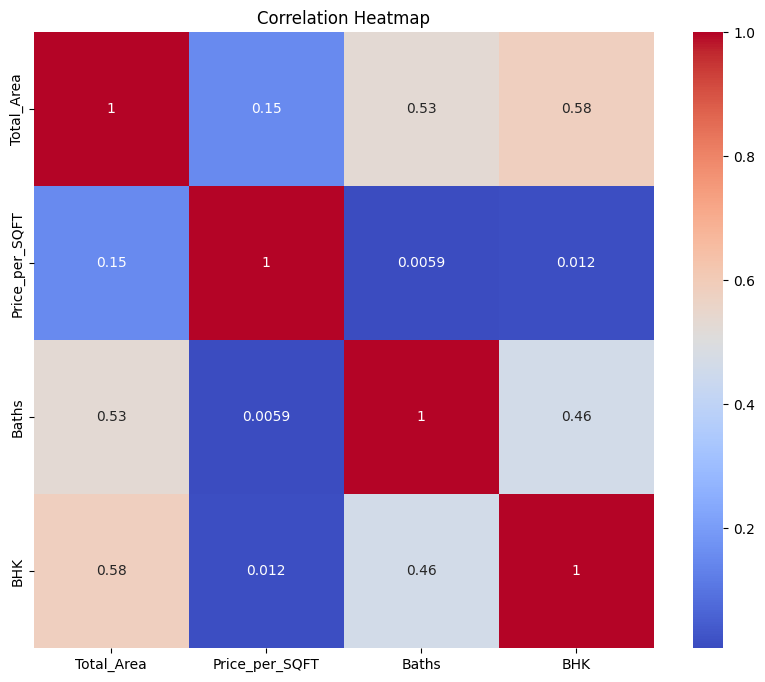

In [13]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

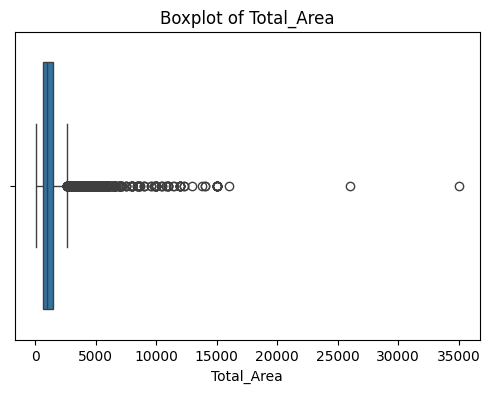

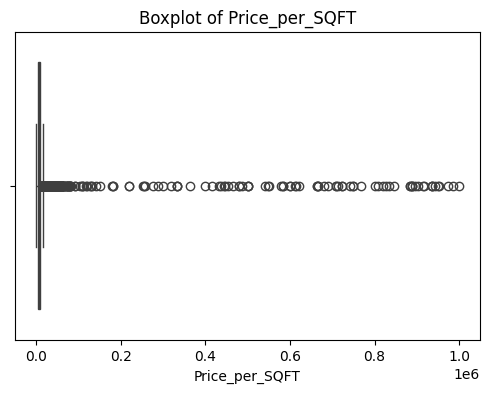

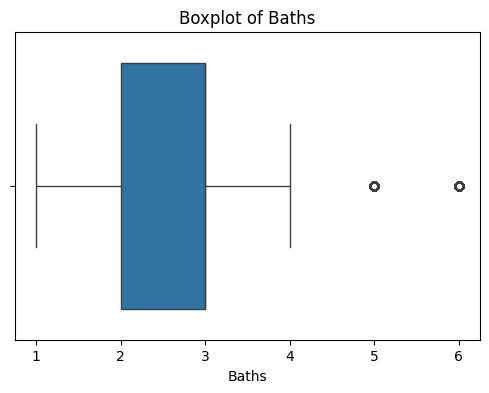

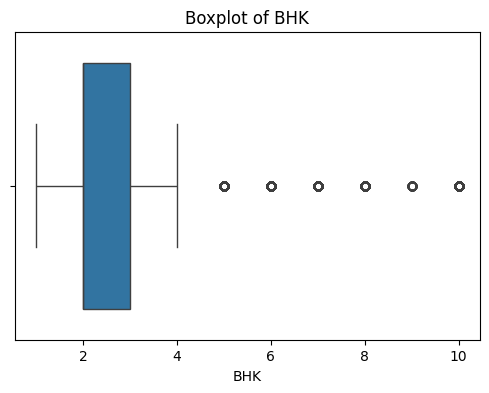

In [15]:
for col in data.select_dtypes(include=["float", "int"]):
    plt.figure(figsize=(6,4))
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [16]:
# Skewness
print(data.skew(numeric_only=True))


Total_Area         5.940778
Price_per_SQFT    15.089859
Baths              0.592657
BHK                2.104240
dtype: float64


In [17]:
top_cost = data.sort_values(by="Price_per_SQFT", ascending=False).head(10)
print(top_cost[["Location", "Total_Area", "Baths", "BHK", "Price_per_SQFT"]])

                                                Location  Total_Area  Baths  \
12276                      lakefront,Uruli Kanchan, Pune        1000      3   
5698      Richard Xavier's Colony, Neelasandra,Bangalore         760      2   
14380  rohini sec 4,Vijay Vihar Phase II, Sector 4 Ro...         390      1   
5809                                   Marsur, Bangalore        1050      3   
13943                            Chirag Dilli, New Delhi        2000      1   
13817                         Madanpur Khadar, New Delhi         540      2   
7724            Vasai East Salt Plant, Vasai East,Mumbai         320      1   
13436              Pocket F,Sector B-2, Narela,New Delhi         160      1   
4084                             Kamala Nagar, Bangalore        1600      3   
5416                               Andrahalli, Bangalore       12000      5   

       BHK  Price_per_SQFT  
12276  3.0        999000.0  
5698   6.0        986000.0  
14380  3.0        974000.0  
5809   2.0    

Location
lakefront,Uruli Kanchan, Pune                                   999000.0
rohini sec 4,Vijay Vihar Phase II, Sector 4 Rohini,New Delhi    974000.0
Chirag Dilli, New Delhi                                         950000.0
Pocket F,Sector B-2, Narela,New Delhi                           937000.0
Bamangachi ,Noapara, Barasat,Kolkata                            895000.0
orchid lake,Banashankari 2nd Block, Kariyana Palya,Bangalore    847000.0
krushika,Lingadheeranahalli, Bangalore                          826000.0
Hariharpur, Kolkata                                             808000.0
Ward 18, Madhyamgram,Kolkata                                    800000.0
Honeyy group,Vijaya Gardens, Nagole,Hyderabad                   750000.0
Name: Price_per_SQFT, dtype: float64


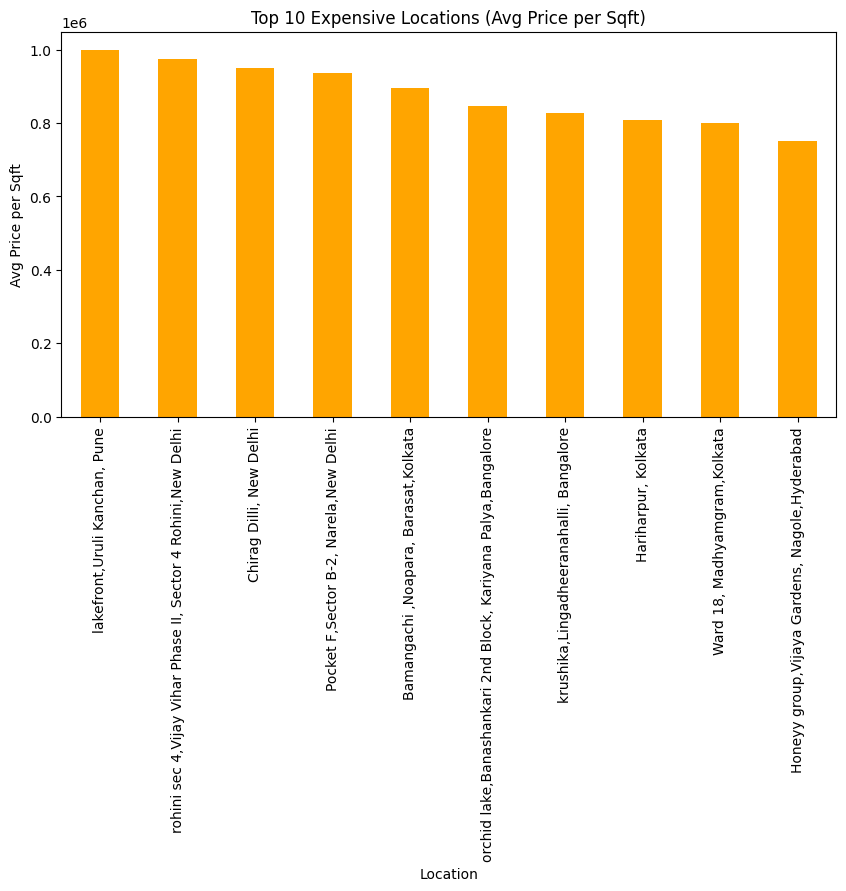

In [18]:
avg_cost_loc = data.groupby("Location")["Price_per_SQFT"].mean().sort_values(ascending=False)
print(avg_cost_loc.head(10))  # Top 10 costliest locations

plt.figure(figsize=(10,5))
avg_cost_loc.head(10).plot(kind="bar", color="orange")
plt.title("Top 10 Expensive Locations (Avg Price per Sqft)")
plt.ylabel("Avg Price per Sqft")
plt.show()

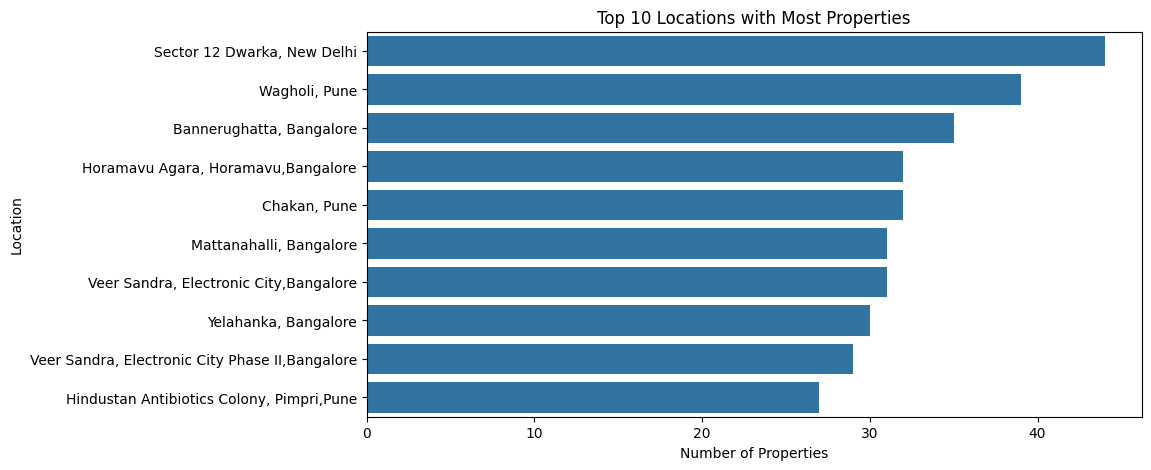

In [19]:
count_loc = data["Location"].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=count_loc.values, y=count_loc.index)
plt.title("Top 10 Locations with Most Properties")
plt.xlabel("Number of Properties")
plt.show()

In [20]:
# Properties that cost above 99th percentile
threshold = data["Price_per_SQFT"].quantile(0.99)
high_end = data[data["Price_per_SQFT"] > threshold]
print(high_end[["Location", "Total_Area", "BHK", "Baths", "Price_per_SQFT"]])

                                                Location  Total_Area  BHK  \
820                                  Palavakkam, Chennai        2000  3.0   
964                  Ganapathi Nagar, Vanagaram ,Chennai         625  2.0   
988              Sai Ganesh Nagar, Jalladian Pet,Chennai         610  1.0   
1063           Swarnambigai Nagar, Virugambakkam,Chennai        1300  3.0   
1166       korathur,Venkataraman Nagar, Korattur,Chennai        1850  3.0   
...                                                  ...         ...  ...   
14418               Meer Vihar, Madanpur Dabas,New Delhi         250  2.0   
14423                    Prem Nagar, Najafgarh,New Delhi        2500  2.0   
14487  Mahavir Enclave Part 1, Mahavir Enclave,New Delhi         900  1.0   
14491                               Wazirabad, New Delhi         250  5.0   
14511       Hari Enclave, Kirari Suleman Nagar,New Delhi        5000  3.0   

       Baths  Price_per_SQFT  
820        1        600000.0  
964        2 

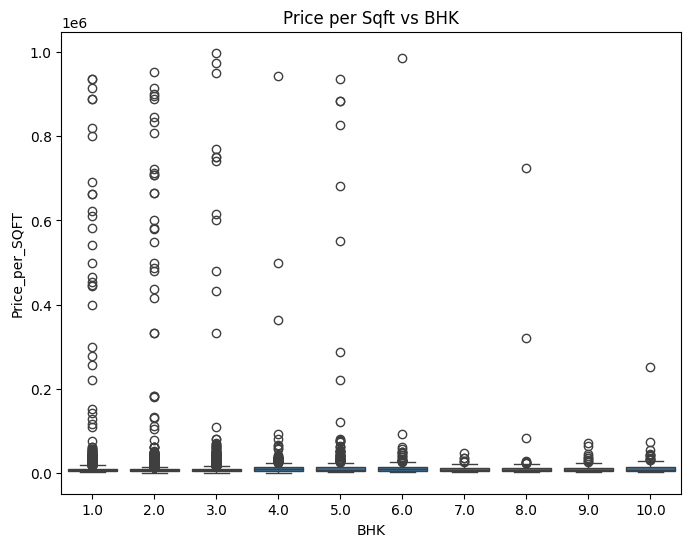

In [21]:
plt.figure(figsize=(8,6))
sns.boxplot(x="BHK", y="Price_per_SQFT", data=data)
plt.title("Price per Sqft vs BHK")
plt.show()

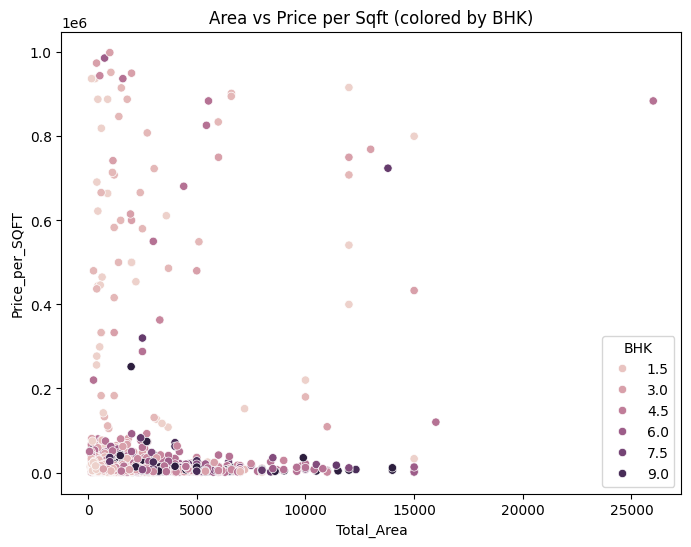

In [22]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="Total_Area", y="Price_per_SQFT", hue="BHK", data=data)
plt.title("Area vs Price per Sqft (colored by BHK)")
plt.show()

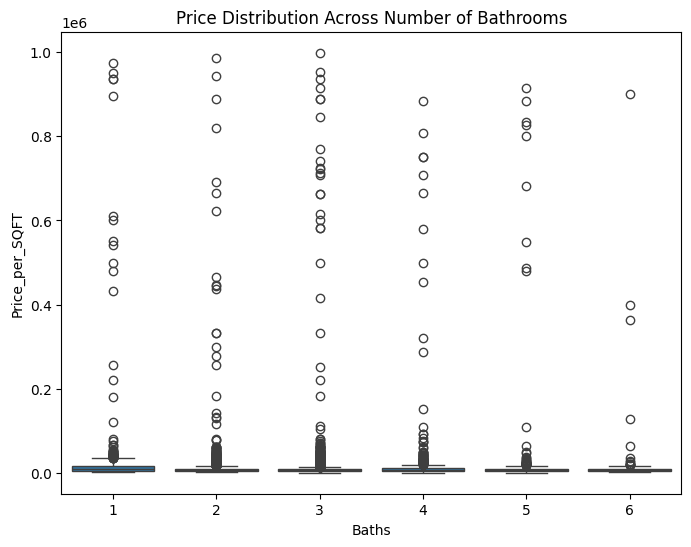

In [23]:
plt.figure(figsize=(8,6))
sns.boxplot(x="Baths", y="Price_per_SQFT", data=data)
plt.title("Price Distribution Across Number of Bathrooms")
plt.show()